# Churn Prediction for Ola Drivers


**Problem Statement:**
Ola faces a significant challenge with high driver churn, which negatively impacts business costs and morale. Recruiting new drivers is expensive, and retaining existing ones is more cost-effective. This project aims to predict driver attrition using demographic, tenure, and performance data to reduce churn and support retention strategies.


**Column Profiling:**

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)



In [1]:
# importing important libraries for EDA 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# loading the data as a dataframe
df = pd.read_csv("ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.shape # showing total no of rows and columns

(19104, 14)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace = True) # dropping the feature as it will cause confusion to the mdel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
df.isna().sum() # showing total null values in all features

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.loc[~df["LastWorkingDate"].isna()] # checking the data at which "LastWorkingdate" is not null

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1
12,03/01/19,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,1
20,11/01/20,8,34.0,0.0,C2,0,70656,19/09/20,15/11/20,3,3,0,1
27,12/01/19,12,35.0,0.0,C23,2,28116,29/06/19,21/12/19,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,02/01/20,2779,28.0,0.0,C26,0,95133,26/01/20,14/02/20,3,3,0,1
19054,08/01/19,2782,26.0,0.0,C19,1,29582,16/05/19,16/08/19,1,1,0,1
19081,10/01/20,2785,34.0,1.0,C9,0,12105,28/08/20,28/10/20,1,1,0,1
19090,09/01/19,2786,45.0,0.0,C19,0,35370,31/07/18,22/09/19,2,2,0,1


In [8]:
df.loc[df["Gender"].isna()].head() # checking the data at which "Gender" feature is not null

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
240,02/01/19,43,27.0,NaN,C15,0,12906,13/07/18,20/02/19,1,1,0,1
258,02/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,0,1
264,08/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,300300,2
466,08/01/19,68,31.0,NaN,C29,0,79288,18/10/15,NaN,1,3,544930,3
820,02/01/19,116,21.0,NaN,C11,0,16477,12/04/18,NaN,1,1,129590,1


# 1. Feature Engineering

In [9]:
# convertying the date-type feature from string to datetime type
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [11]:
df["LastWorkingDate"].nunique() # checking number on unique values

493

In [12]:
data = df.select_dtypes(["int","float"])
x = data.columns
data.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [13]:
# imputing null values of numerical features  with knn imputation
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data = knn.fit_transform(data)
data = pd.DataFrame(data, columns = x)
data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [14]:
data.isna().sum() # checking null values in all features

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [15]:

data = pd.concat([data, df[["MMM-YY", "City", "Dateofjoining", "LastWorkingDate"]]], axis=1)
data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaT
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaT
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,2019-03-11
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaT
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaT


In [16]:
dict_agg = ({"Age":"last", "Gender":"last", "Education_Level":"last", "Income":"last", "Joining Designation":"last", "Grade":"last", 
          "Total Business Value":"sum", "Quarterly Rating":"last", "City":"last", "Dateofjoining":"first", 
          "LastWorkingDate":"last"})

data = data.groupby(["Driver_ID", "MMM-YY"]).agg(dict_agg)
data.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1.0       2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2.0       2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1.0       2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2.0       2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating City Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                           
1.0       2019-01-01               2.0  C23    2018-12-24             NaT  
          2019-02-01               2.0  C23    2018-12-24             NaT  
          2019-03-01               2.0  C23    2018-12-24      2019-03-11  
2.0       2020-11-01               1.0   C7    2020-11-06             NaT  
          2020-12-01               1.0   C7    2020-11-06             NaT

In [17]:
data.sort_index(ascending = [True, True])

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1.0       2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2.0       2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   
...                    ...     ...              ...      ...   
2788.0    2020-08-01  30.0     0.0              2.0  70254.0   
          2020-09-01  30.0     0.0              2.0  70254.0   
          2020-10-01  30.0     0.0              2.0  70254.0   
          2020-11-01  30.0     0.0              2.0  70254.0   
          2020-12-01  30.0     0.0              2.0  70254.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1.0       2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2.0       2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   
...                                   ...    ...                   ...   
2788.0    2020-08-01                  2.0    2.0              740280.0   
          2020-09-01                  2.0    2.0              448370.0   
          2020-10-01                  2.0    2.0                   0.0   
          2020-11-01                  2.0    2.0              200420.0   
          2020-12-01                  2.0    2.0              411480.0   

                      Quarterly Rating City Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                           
1.0       2019-01-01               2.0  C23    2018-12-24             NaT  
          2019-02-01               2.0  C23    2018-12-24             NaT  
          2019-03-01               2.0  C23    2018-12-24      2019-03-11  
2.0       2020-11-01               1.0   C7    2020-11-06             NaT  
          2020-12-01               1.0   C7    2020-11-06             NaT  
...                                ...  ...           ...             ...  
2788.0    2020-08-01               3.0  C27    2020-06-08             NaT  
          2020-09-01               3.0  C27    2020-06-08             NaT  
          2020-10-01               2.0  C27    2020-06-08             NaT  
          2020-11-01               2.0  C27    2020-06-08             NaT  
          2020-12-01               2.0  C27    2020-06-08             NaT  

[19104 rows x 11 columns]

In [18]:
# asign a new dataframe df1 to store the unique Driver_ID, to merge the all the features corresponding to Driver_ID
df1 = pd.DataFrame()
df1["Driver_ID"] = df["Driver_ID"].unique()



In [19]:
df1['Age'] = list(df.groupby('Driver_ID').agg({"Age":"last"})["Age"])
df1['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])


df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2,2,0,1
2,4,43.0,0.0,C13,2,65603,2,2,350000,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2


In [20]:
df1.shape 

(2381, 10)

In [21]:
# adding a new feature in the dataframe "Quarterlyrating_increased" to check whether quarterly_rating increased for each Driver_ID
y = data.groupby("Driver_ID").agg({"Quarterly Rating":"first"})["Quarterly Rating"].reset_index()
z = list(df1["Last_Quarterly_Rating"].values - y["Quarterly Rating"].values)
df1["Quarterlyrating_increased"] = [1 if x > 0 else 0 for x in z]

In [22]:
# adding a new feature in the dataframe "Income_inc" to check whether income increased for each Driver_ID
y = data.groupby("Driver_ID").agg({"Income":"first"})["Income"].reset_index()
z = list(df1["Income"].values - y["Income"].values)
df1["Income_inc"] = [1 if x > 0 else 0 for x in z]

In [23]:
# adding the Traget features based on the "LastWorkingDate" feature for each Driver_ID
df1["Target"] = [0 if pd.isna(x) else 1 for x in (data.groupby("Driver_ID").agg({"LastWorkingDate":"last"})["LastWorkingDate"].values)]


In [24]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc,Target
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0


In [25]:
df1.shape

(2381, 13)

In [26]:
df1.dtypes

Driver_ID                      int64
Age                          float64
Gender                       float64
City                          object
Education                      int64
Income                         int64
Joining_Designation            int64
Grade                          int64
Total_Business_Value           int64
Last_Quarterly_Rating          int64
Quarterlyrating_increased      int64
Income_inc                     int64
Target                         int64
dtype: object

In [27]:
df1.City.value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

# 2. Exploratory Data Analysis (EDA)

- **Univariate Graphical Analysis**

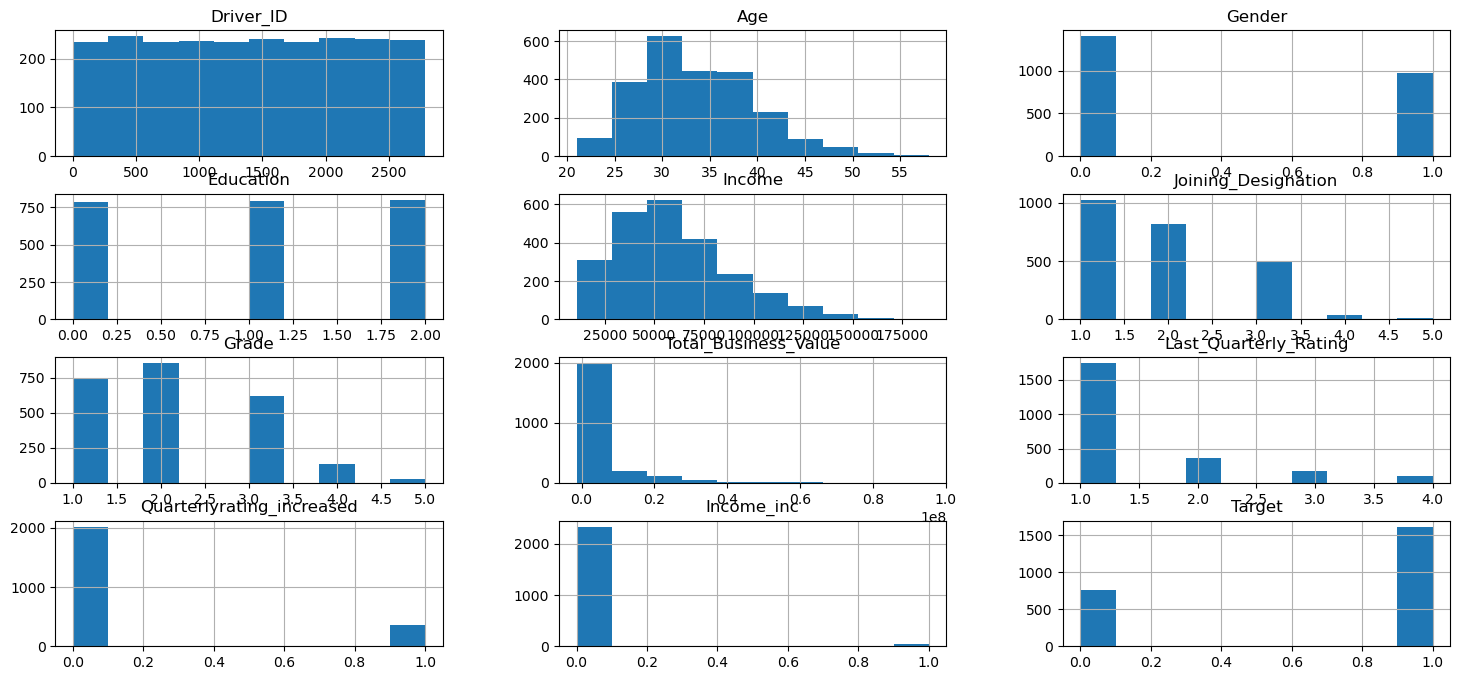

In [28]:
# hostogram for all features
df1.hist(figsize = (18,8))
plt.show() 

**Insights:**
- Feature Driver_id showing uniform distribution, which is obvious as the driver_id is the unique identifier for the drivers; we have to remove this feature as it will not add any meaningful infoirmation.
- Feature Age and Gender showing skewness in the distribution.

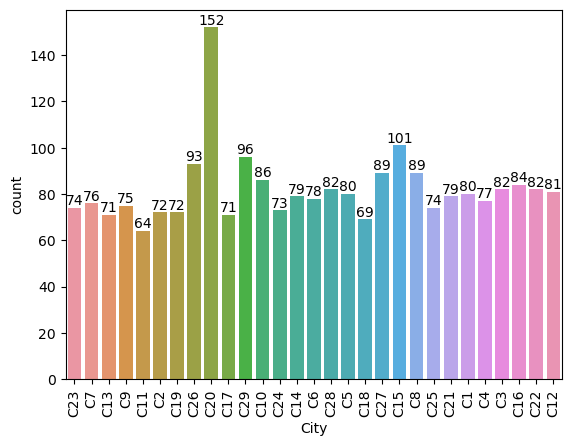

In [29]:
# countplot for categorical feature City
b = sns.countplot(data=df1, x = "City")
b.bar_label(b.containers[0], label_type="edge")
plt.xticks(rotation=90)
plt.show()

**Insights:**

- Maximum number of the drivers belong to C20 city.

<Figure size 1500x900 with 0 Axes>

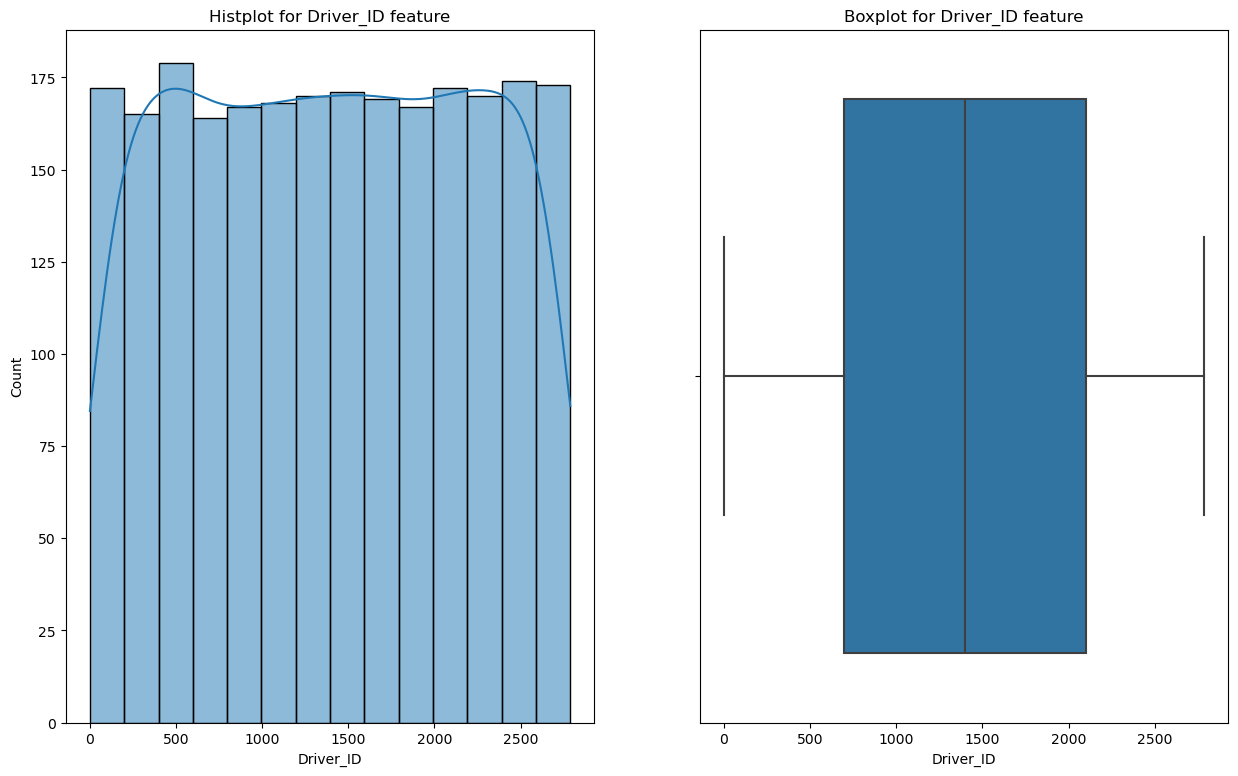

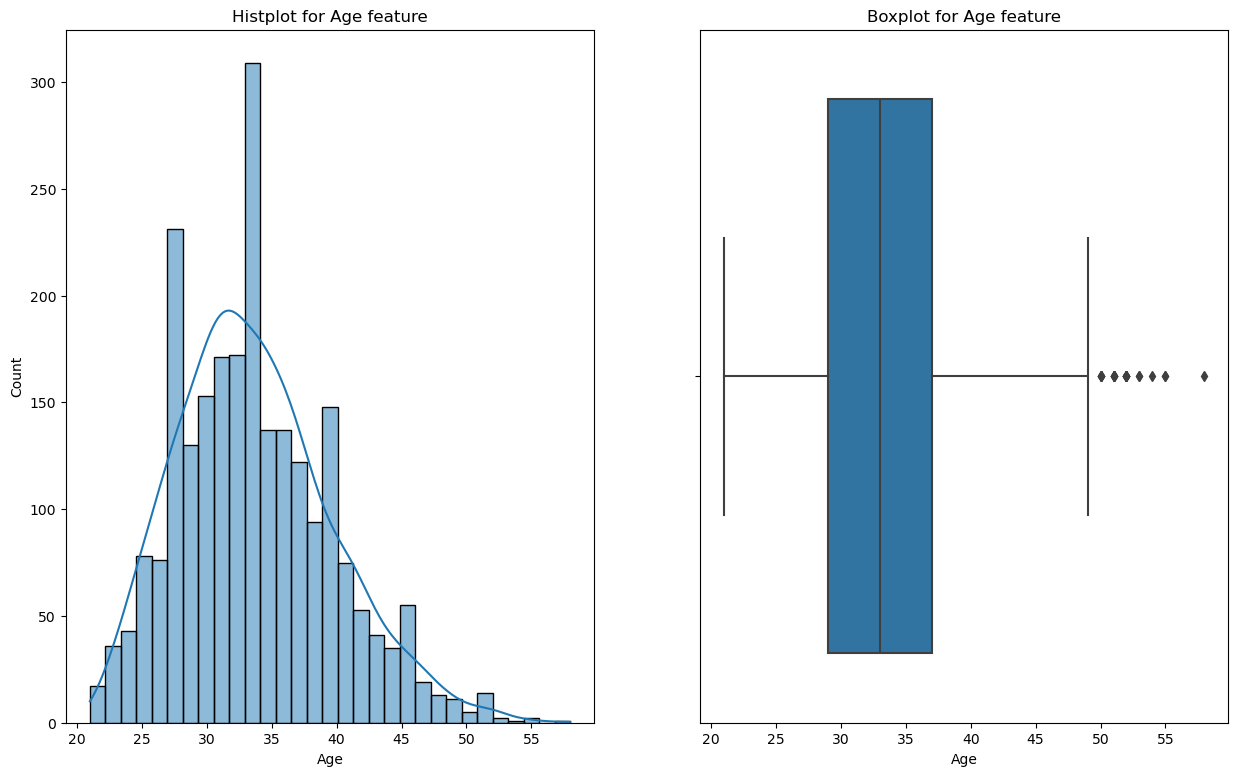

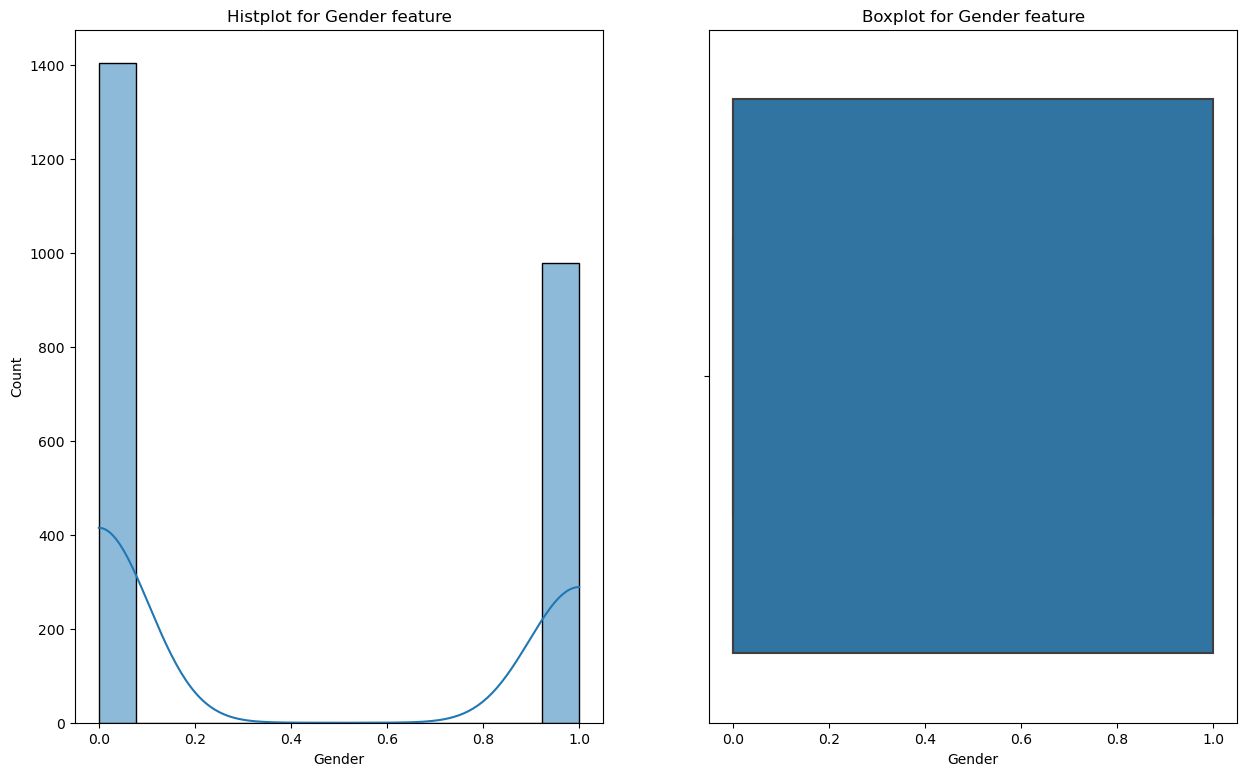

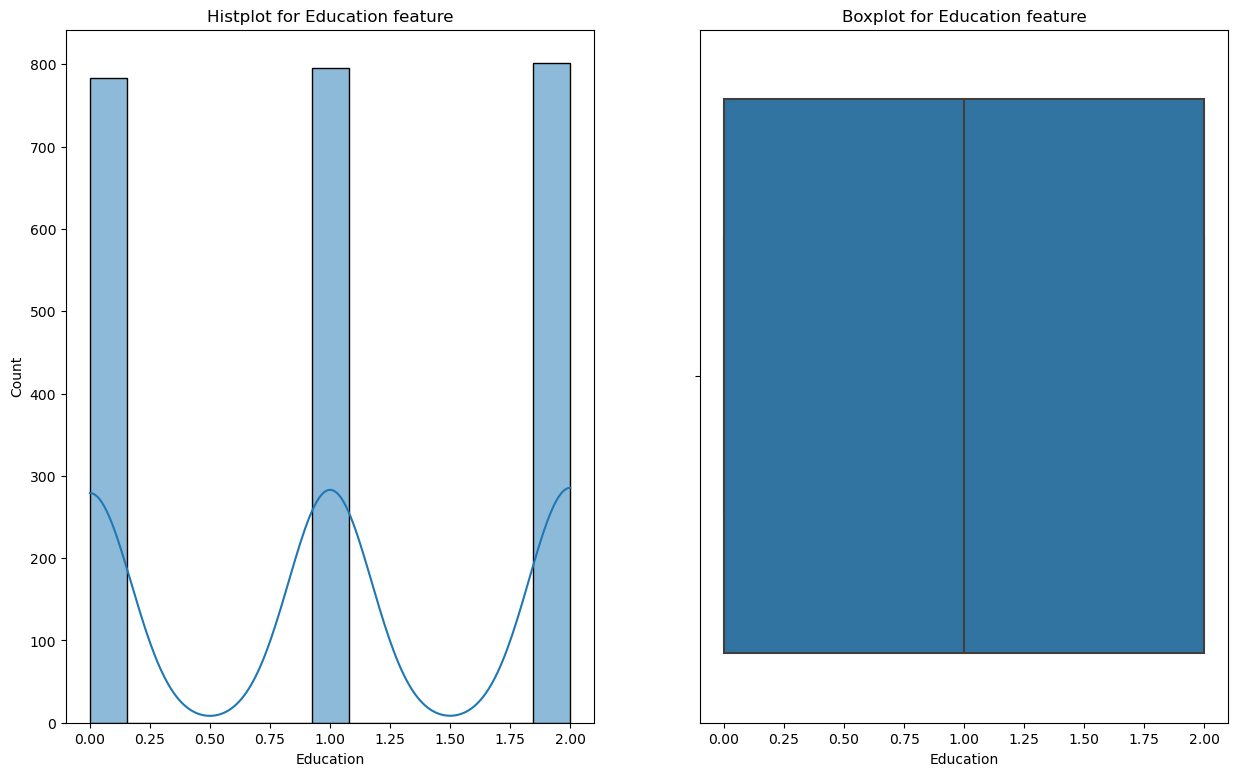

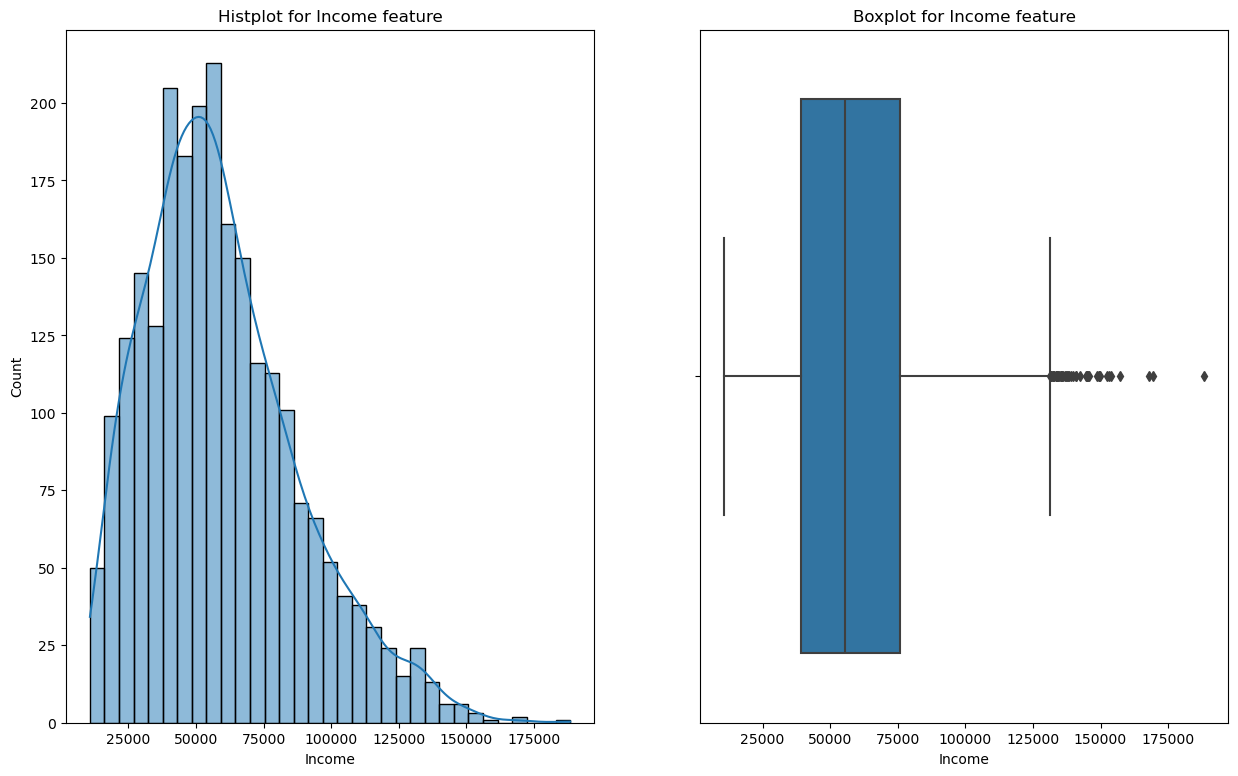

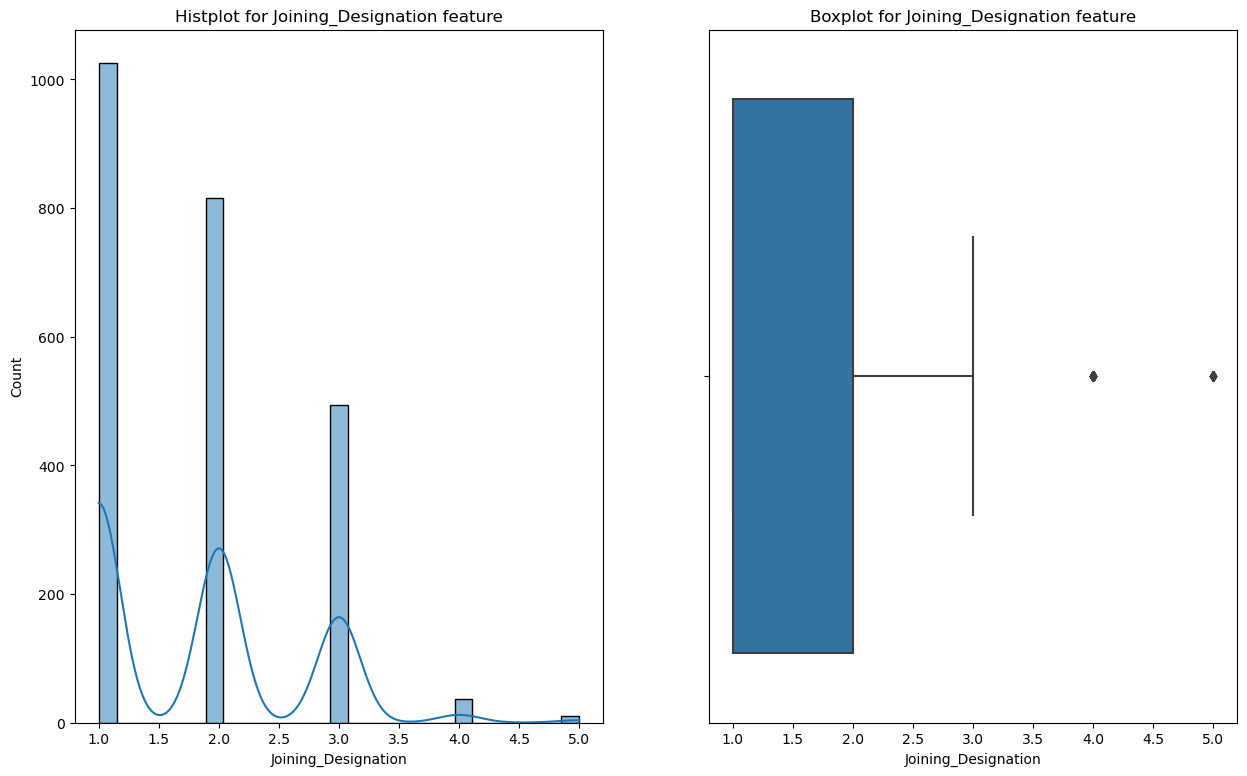

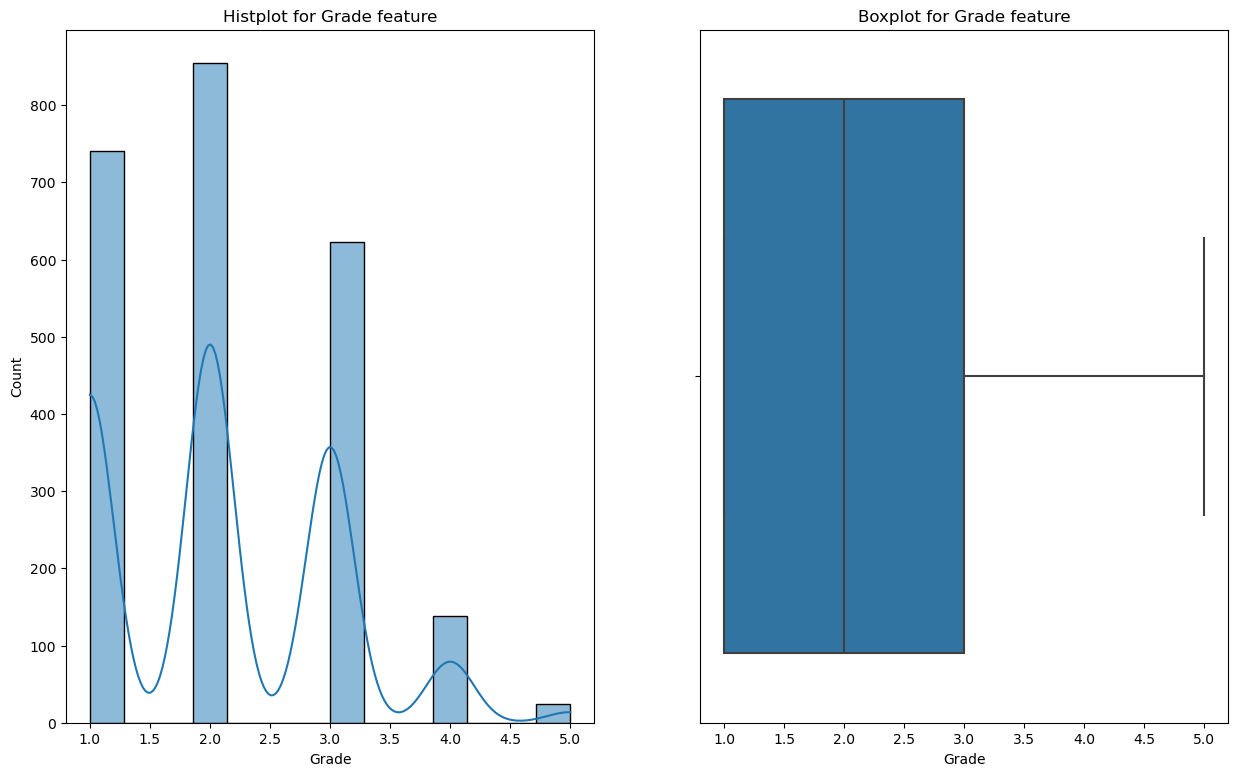

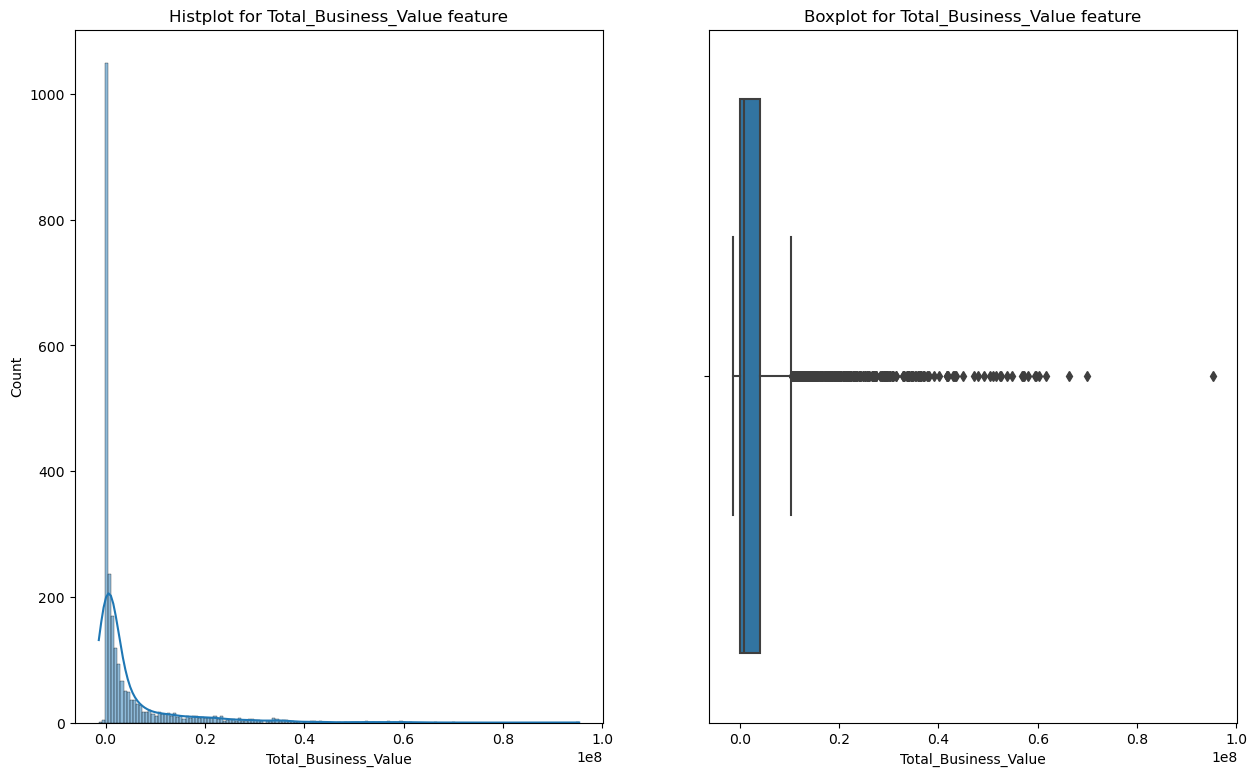

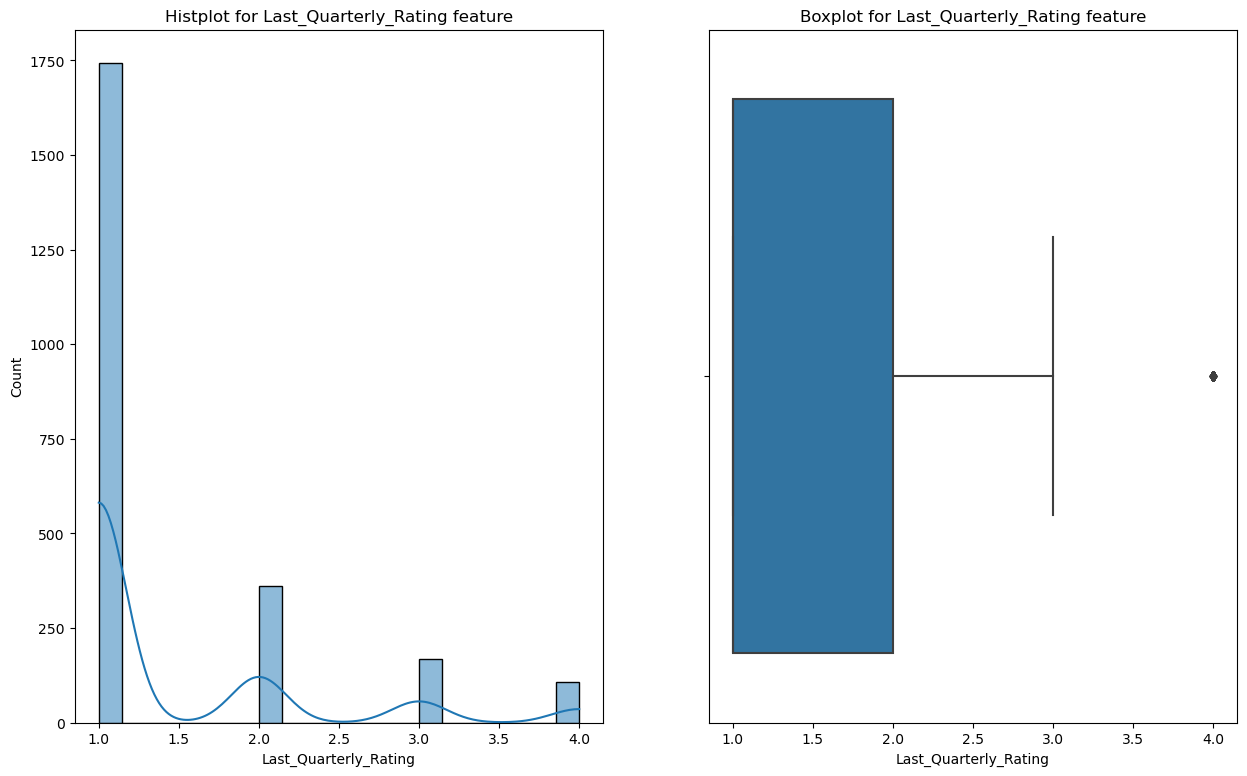

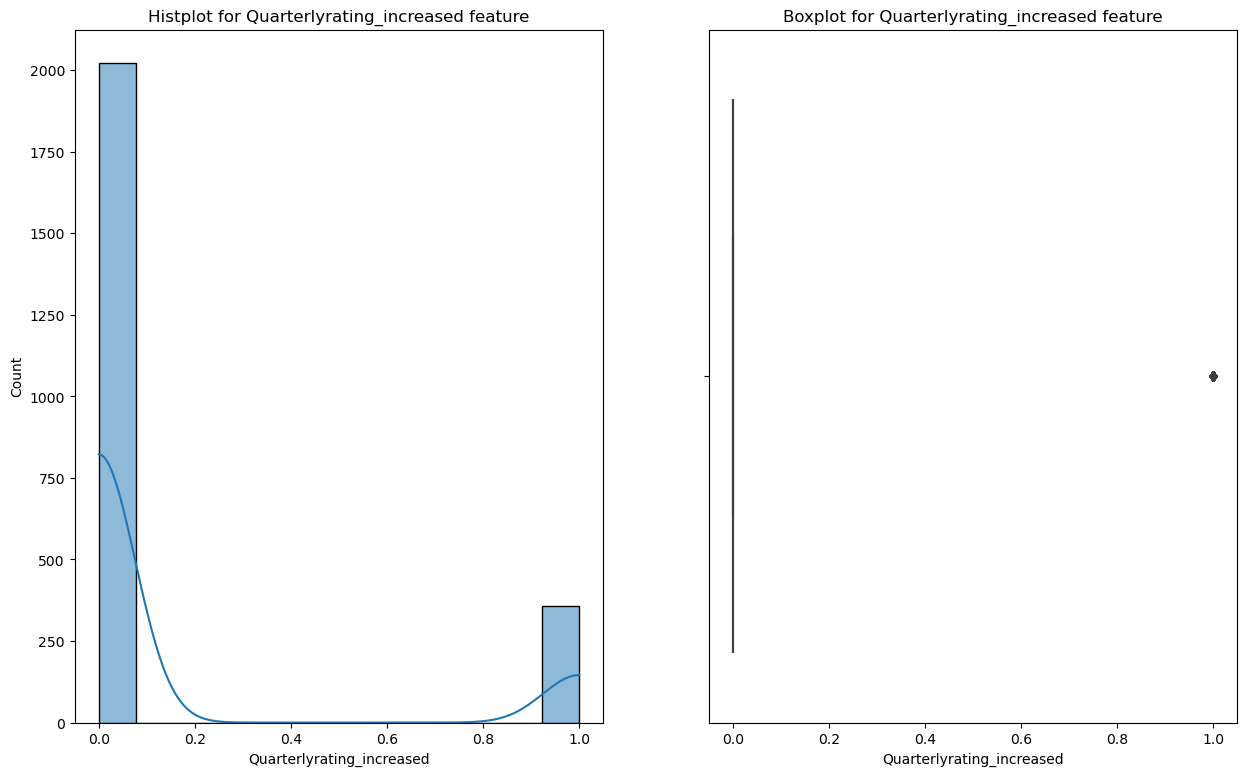

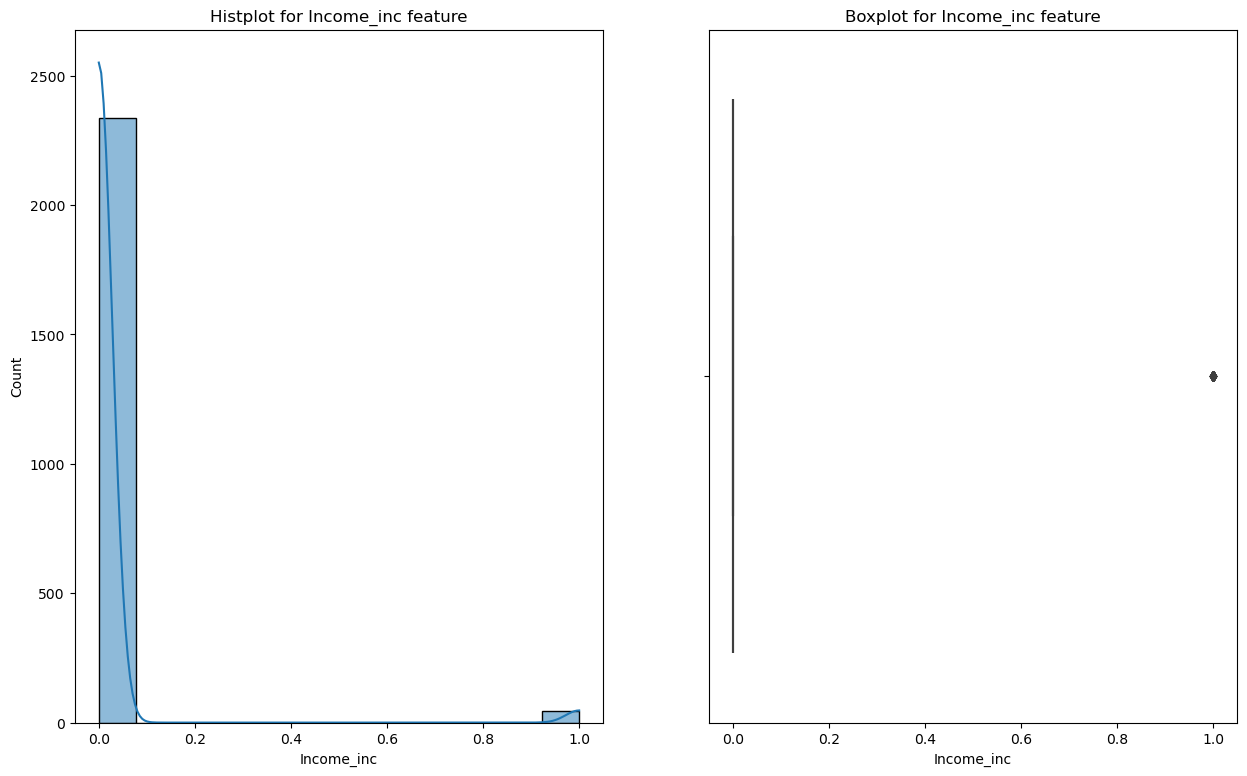

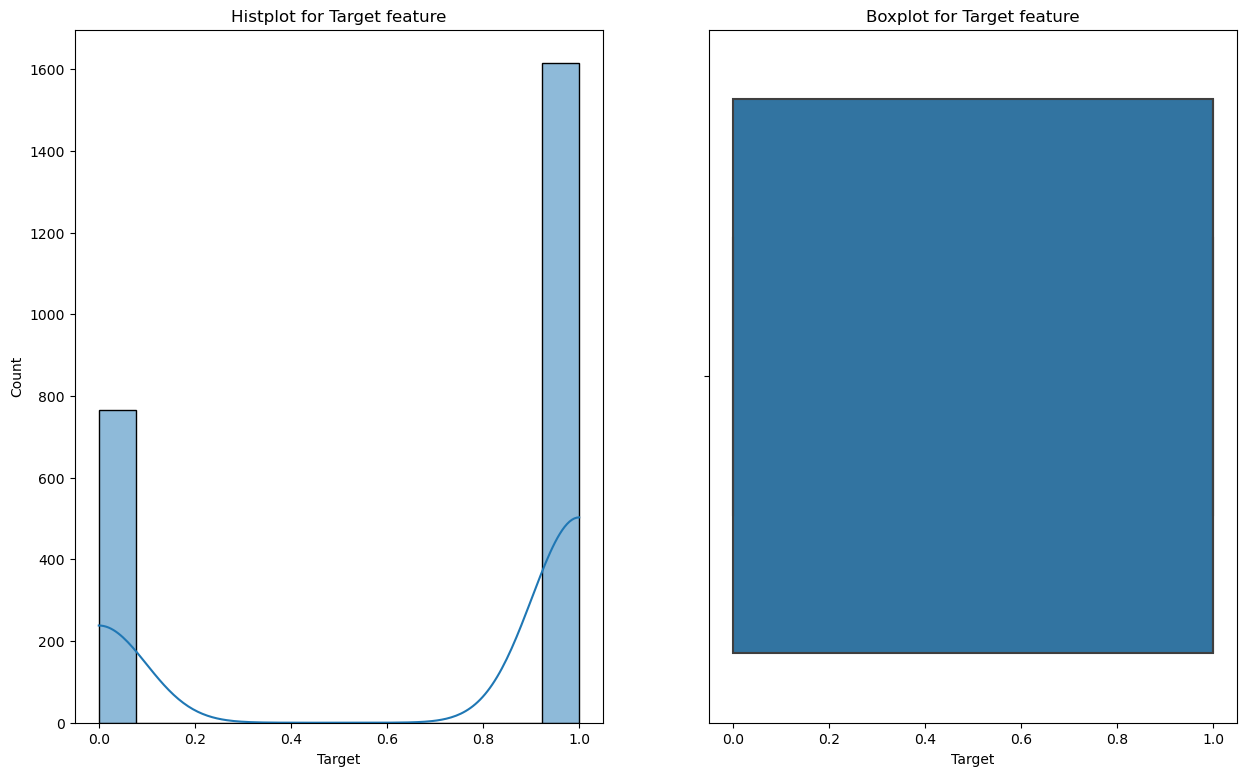

In [30]:
plt.figure(figsize = (15,9))
for i in df1.select_dtypes(["int","float"]).columns:
    plt.figure(figsize = (15,9))
    plt.subplot(1,2,1)
    sns.histplot(data = df1, x = i, kde = True) # Histogram for numerical features
    plt.title(f"Histplot for {i} feature")

    
    plt.subplot(1,2,2)    
    sns.boxplot(data = df1, x = i) # Boxplot for numerical features
    plt.title(f"Boxplot for {i} feature")
    plt.show()

- **Bivariate Graphical Analysis**

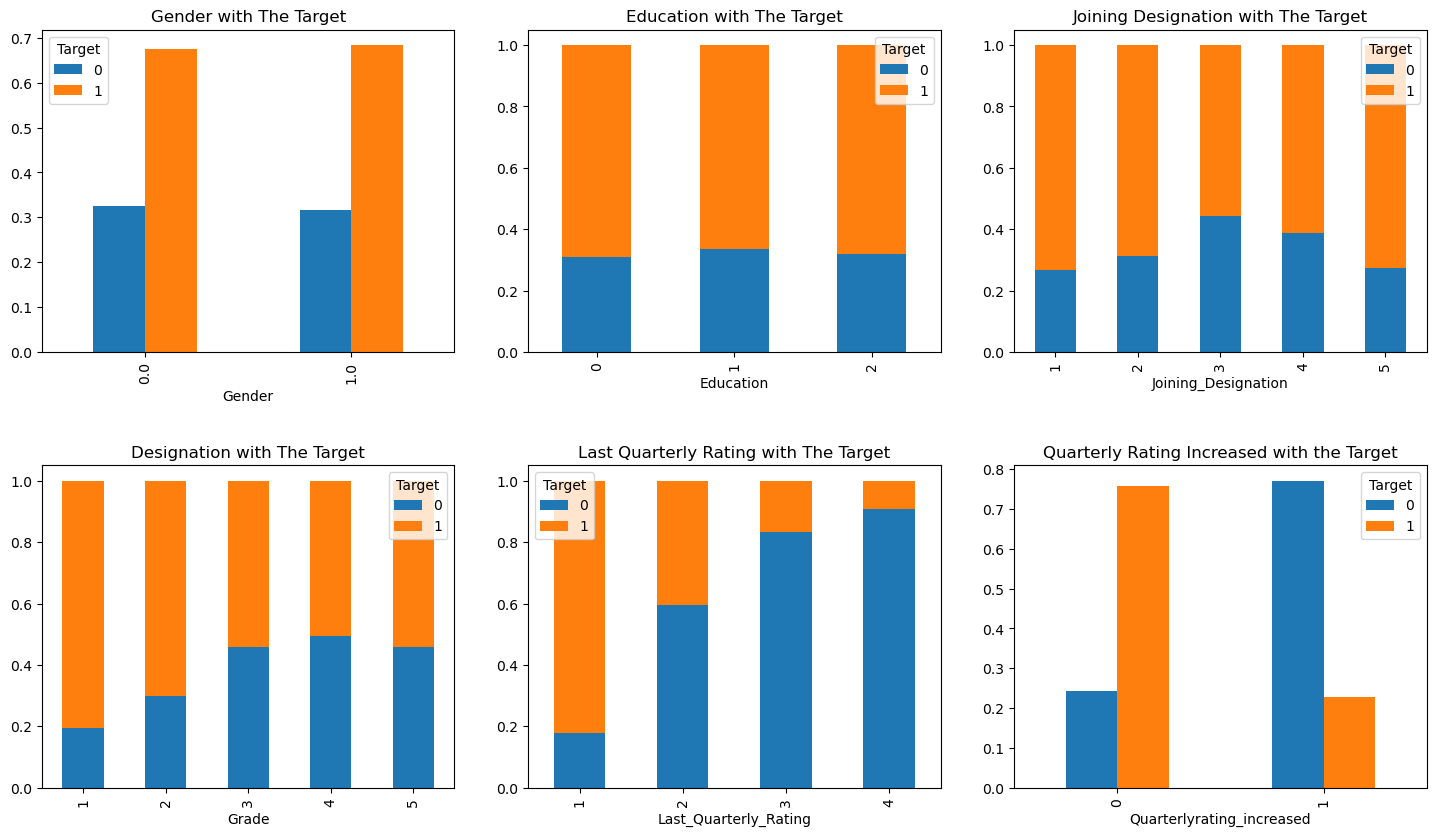

In [31]:
figure,axes=plt.subplots(2,3,figsize=(15,9))

#Gender feature with Target
gender = pd.crosstab(df1['Gender'],df1['Target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],title="Gender with The Target")

#Education feature with Target
education = pd.crosstab(df1['Education'],df1['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],
                                                          title="Education with The Target")

#Joining Designation feature with Target
jde = pd.crosstab(df1['Joining_Designation'],df1['Target'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,2],
                                                      title="Joining Designation with The Target")

#Designation feature with Target
desig = pd.crosstab(df1['Grade'],df1['Target'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],
                                                    title="Designation with The Target")

#Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df1['Last_Quarterly_Rating'],df1['Target'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],
                                                      title="Last Quarterly Rating with The Target")

#Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df1['Quarterlyrating_increased'],df1['Target'])
qratei.div(qratei.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[1,2],
                                                         title="Quarterly Rating Increased with the Target")

plt.tight_layout(pad=3)

**Insights:**

- The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.
- The drivers who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
- The drivers who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
- The drivers who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
- The drivers whose quarterly rating has increased are less likely to leave the organization.

<Figure size 3000x700 with 0 Axes>

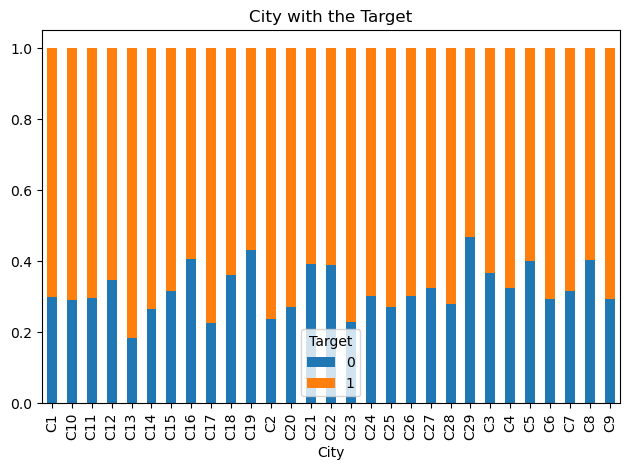

In [32]:
#City feature with the target
plt.figure(figsize=(30,7))
city = pd.crosstab(df1['City'],df1['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="City with the Target")
plt.tight_layout()

**Insights:**

- The drivers who belong to City - C29, C19, C8, C5 at the time of reporting are less likely to leave the organization.

<Axes: title={'center': 'Age with Target'}, xlabel='Age'>

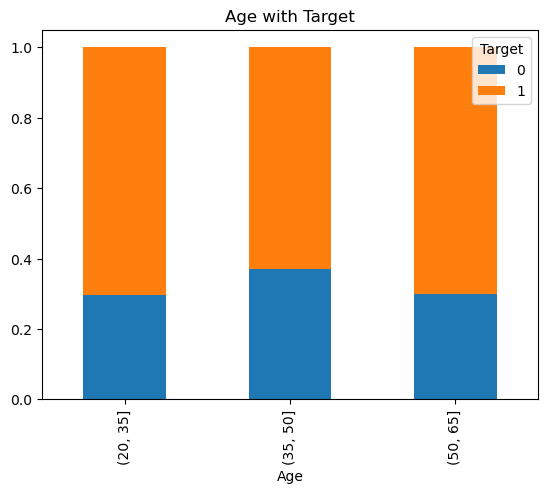

In [33]:
#Binning the Age into categories
x = pd.cut(df1['Age'],bins=[20,35,50,65])

#Age feature with Target
agebin = pd.crosstab(x,df1['Target'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with Target")

**Insights:**

- The driverss whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.

<Figure size 2500x1500 with 0 Axes>

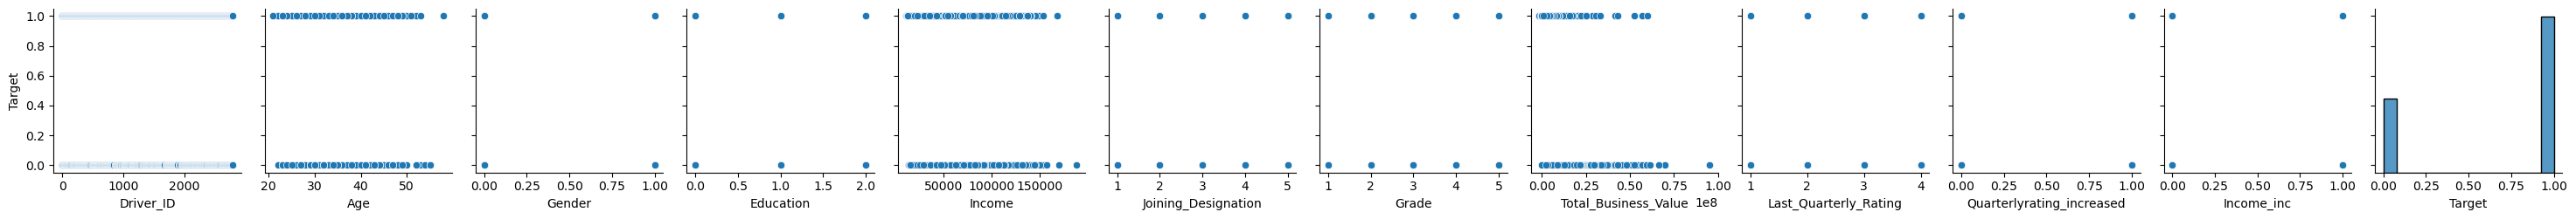

In [34]:
plt.figure(figsize=(25,15))
sns.pairplot(data=df1, y_vars = "Target")
plt.show()

<Axes: title={'center': 'Income with Target'}, xlabel='Income'>

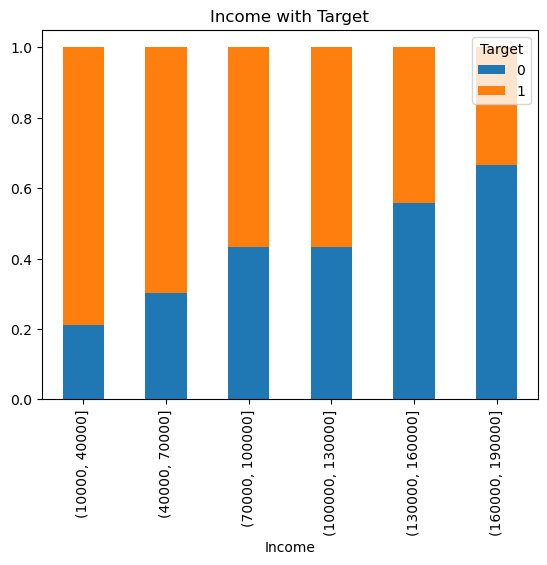

In [35]:
#Binning the Income into categories
x = pd.cut(df1['Income'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

#Salary feature with Target
salarybin = pd.crosstab(x,df1['Target'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Income with Target")

**Insights:**

- The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.

<Axes: title={'center': 'Total Business Value with Target'}, xlabel='Total_Business_Value'>

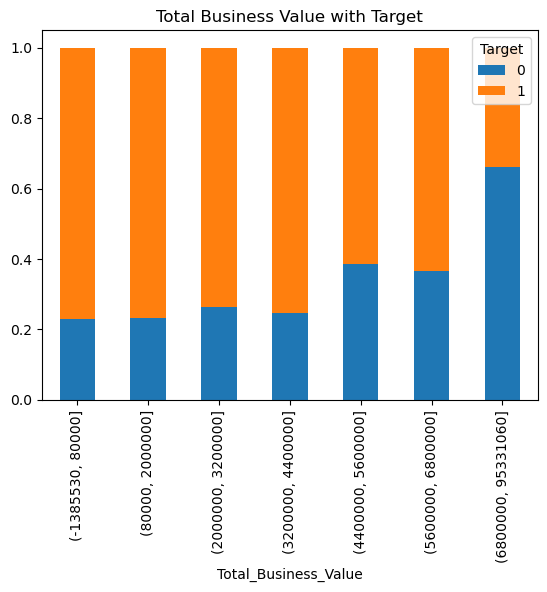

In [36]:
#Defining the bins and groups
m1 = round(df1['Total_Business_Value'].min())
m2 = round(df1['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

#Binning the Total Business Value into categories
x = pd.cut(df1['Total_Business_Value'],bins)

#Total Business Value feature with Target
tbvbin = pd.crosstab(x,df1['Target'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value with Target")

**Insights:**

- The drivers who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion.

In [37]:
df1.Target.value_counts()

Target
1    1616
0     765
Name: count, dtype: int64

# 3. Train Test Split

In [38]:
# dropping the driver_id as it is unique identifier for the row, it will cause confusion to the  model
df1.drop("Driver_ID", axis=1, inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop("Target",axis=1),df1["Target"],test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(1904, 11) (1904,)


In [40]:
import category_encoders as ce

# Initialize target encoder
target_encoder = ce.TargetEncoder(cols=['City'])

# Fit the encoder to the training data and transform both train and test sets
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Display encoded data
print("Encoded Train Set:\n", X_train_encoded.shape)
print("\nEncoded Test Set:\n", X_test_encoded.shape)


Encoded Train Set:
 (1904, 11)

Encoded Test Set:
 (477, 11)


In [41]:
X_train_encoded.head()

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
457,28.0,0.0,0.745108,0,87872,3,3,0,1,0,0
1739,34.0,0.0,0.699186,0,38619,2,2,466160,1,0,0
1848,27.0,0.0,0.732320,0,53105,1,2,0,1,0,0
1410,30.0,1.0,0.611473,2,34234,1,1,3489080,2,1,0
829,47.0,0.0,0.611473,0,90484,1,3,22388420,3,0,0


In [42]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns = X_train_encoded.columns) # Normalizing the training Data
X_test = pd.DataFrame(scaler.transform(X_test_encoded), columns = X_test_encoded.columns) # Normalizing the testing data with the parameters of training data


In [43]:
X_test.head() #unseen data

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
0,0.441176,0.0,0.218236,1.0,0.274293,0.25,0.25,0.014326,0.0,0.0,0.0
1,0.176471,1.0,0.000000,1.0,0.374974,0.00,0.50,0.029269,0.0,0.0,0.0
2,0.235294,0.0,0.530212,0.5,0.260245,0.25,0.25,0.014326,0.0,0.0,0.0
3,0.294118,0.0,0.218236,1.0,0.114690,0.00,0.00,0.014326,0.0,0.0,0.0
4,0.411765,0.0,0.000000,1.0,0.163651,0.00,0.00,0.017944,0.0,0.0,0.0


# 4. Bagging (Random Forest)

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(class_weight = "balanced") # using classweight instead of balancing the dataset with the synthetic one
clf = RandomizedSearchCV(rfc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now() # checking time before Hyperparameter tuning
clf.fit(X_train, y_train)
end = dt.datetime.now() # # checking time after Hyperparameter tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [45]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.8383783621645678 Rank: 10
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 10} Mean_score: 0.8504436750340195 Rank: 9
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 20} Mean_score: 0.852551020856529 Rank: 7
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.8558799044535336 Rank: 3
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 10} Mean_score: 0.8534679296207481 Rank: 5
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.852686895891852 Rank: 6
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.8607367128799419 Rank: 1
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 40, 'max_depth': 10} Mean_score: 0.8524100951671106 Rank: 8
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8560647987601838 Rank: 2
Parameter

In [46]:
len(res["params"])

10

In [47]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:02.536674


In [48]:
print(clf.best_estimator_) # best hyperparamheters

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=40,
                       n_estimators=200)


In [49]:
rf = clf.best_estimator_

# fitting the mdoel on training data with best hyperparameter
rf.fit(X_train, y_train)





RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=40,
                       n_estimators=200)

In [50]:
y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 89,  61],
       [ 34, 293]])

In [52]:
y_pred_train = rf.predict(X_train)

In [53]:
# precision, recall and f1 score on training data
print(f"precision: {precision_score(y_train, y_pred_train)}, recall : {recall_score(y_train, y_pred_train)}, f1_score: {f1_score(y_train, y_pred_train)}")

precision: 0.8531571218795888, recall : 0.9014740108611327, f1_score: 0.8766503206337232


In [54]:
# precision, recall and f1 score on testing data
print(f"precision: {precision_score(y_test, y_pred)}, recall : {recall_score(y_test, y_pred)}, f1_score: {f1_score(y_test, y_pred)}")

precision: 0.827683615819209, recall : 0.8960244648318043, f1_score: 0.8604992657856094


In [55]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

# calculation precision, recall and f1 score on testing data through confusion matrix
print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")


precision: 0.827683615819209
recall: 0.8960244648318043
f1_score: 0.8604992657856094
accuracy: 0.80083857442348


In [56]:
rf.feature_importances_

array([0.02743908, 0.00394201, 0.04378427, 0.00533056, 0.05858731,
       0.05850576, 0.05492202, 0.22125642, 0.36570251, 0.15310719,
       0.00742286])

In [57]:
ind = pd.DataFrame(rf.feature_importances_.reshape(1,-1), columns = X_train.columns)
ind

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
0,0.027439,0.003942,0.043784,0.005331,0.058587,0.058506,0.054922,0.221256,0.365703,0.153107,0.007423


<Axes: xlabel='value', ylabel='variable'>

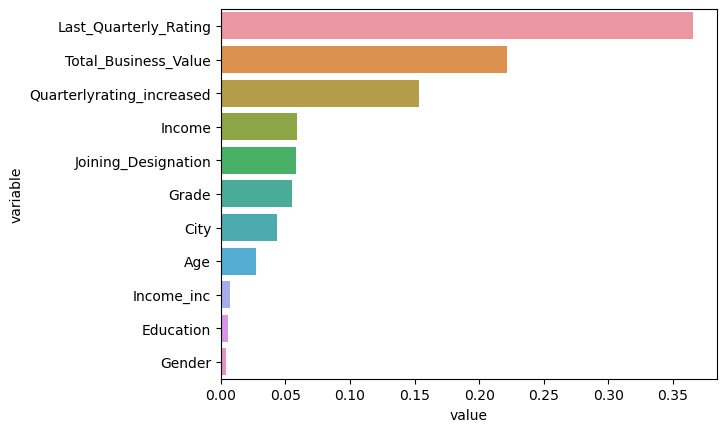

In [58]:
data = ind.melt()
sns.barplot(data = data.sort_values(by="value", ascending=False), y="variable", x="value")

**Insights**
- Most important features are Last_Quarterly_Rating, Total_Business_Value, Quarterlyrating_increased.

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       150
           1       0.83      0.90      0.86       327

    accuracy                           0.80       477
   macro avg       0.78      0.74      0.76       477
weighted avg       0.79      0.80      0.79       477



**Insights:**

- **(Precision)**:The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 74%, and for 1 it is 82%.
- **(Recall)**: The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 91%.

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
# model probabilities
prob = rf.predict_proba(X_test)


In [61]:
# for thresholding we need only one probability i.e. p = P(Y=1|X)
probability = prob[:,1]

In [62]:
fpr, tpr, thr = roc_curve(y_test, probability)

In [63]:
thr

array([1.89471226, 0.89471226, 0.86788525, 0.86183166, 0.81517985,
       0.81478626, 0.80669949, 0.80584462, 0.8023785 , 0.80166906,
       0.7998791 , 0.79978763, 0.79556884, 0.793901  , 0.7876162 ,
       0.78559339, 0.78441506, 0.78426973, 0.78055513, 0.78012781,
       0.77580472, 0.77476738, 0.77111676, 0.77073456, 0.75903847,
       0.7585242 , 0.75630648, 0.75285431, 0.75158449, 0.75125541,
       0.74268708, 0.74155516, 0.73720037, 0.73677072, 0.72758467,
       0.72744981, 0.72679062, 0.72358793, 0.72296594, 0.72161595,
       0.69908636, 0.69653927, 0.68925584, 0.68902945, 0.67911597,
       0.67811945, 0.67597991, 0.67369308, 0.67214952, 0.67072422,
       0.66652502, 0.66519585, 0.65243583, 0.65215563, 0.64944511,
       0.64941122, 0.63967668, 0.63932767, 0.63812916, 0.63724303,
       0.63565791, 0.63115823, 0.62606779, 0.62586768, 0.62401991,
       0.62376463, 0.61513084, 0.61324169, 0.60175832, 0.60063356,
       0.59858678, 0.59745462, 0.58746957, 0.58637959, 0.57524

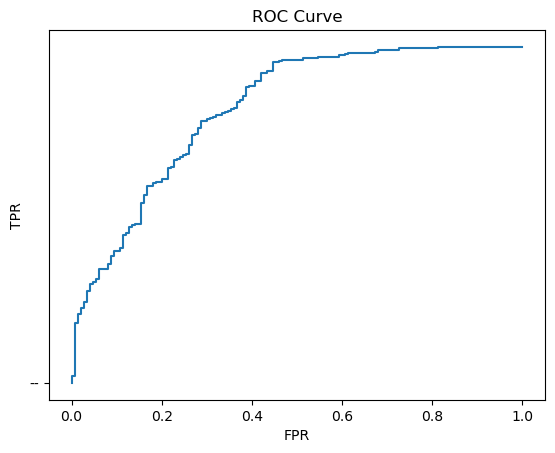

In [64]:
plt.plot(fpr,tpr)

plt.plot("--", color = "r") # random model
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [65]:
#AUC 
roc_auc_score(y_test, probability)

0.8181855249745157

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [67]:
precision, recall, thr = precision_recall_curve(y_test, probability)

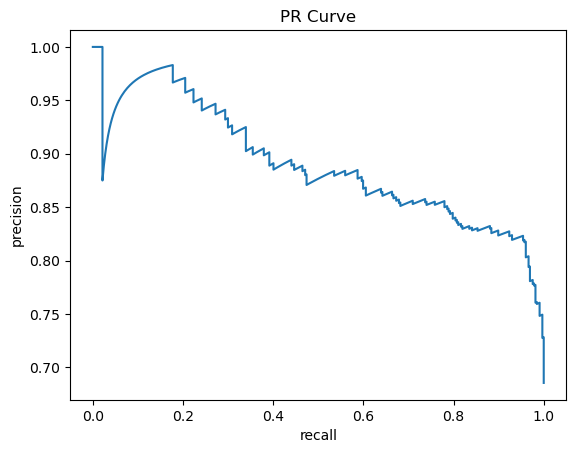

In [68]:
plt.plot(recall, precision)

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR Curve")
plt.show()

In [69]:
auc(recall, precision)

0.8900305266999657

**Insights :**

- Area Under curve for ROC curve is 0.81
- Area unver curve (AUC) for Precision-Recal curve is 0.89
- Since the given dataset is imbalances, we usually check the trade-off between Precision and Recall, instead of FPR and TPR.

# 5. Bagging with SMOTE

In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 7)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 1289
Before OverSampling, counts of label '0': 615 

Before OverSampling, the shape of train_X: (1904, 11)
Before OverSampling, the shape of train_y: (1904,) 

After OverSampling, the shape of train_X: (2578, 11)
After OverSampling, the shape of train_y: (2578,) 

After OverSampling, counts of label '1': 1289
After OverSampling, counts of label '0': 1289


In [71]:
params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC()
clf = RandomizedSearchCV(rfc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [72]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.8043753897815006 Rank: 3
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 10} Mean_score: 0.8061045602179243 Rank: 2
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 3} Mean_score: 0.7784186064536845 Rank: 8
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.7915568043744727 Rank: 6
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7921146221709187 Rank: 5
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.7766581526742579 Rank: 9
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.806994223248059 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.7938216212776105 Rank: 4
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.7911464400062572 Rank: 7
Parame

In [73]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:01.245403


In [74]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, max_leaf_nodes=80, n_estimators=150)


In [75]:
rf = clf.best_estimator_

rf.fit(X_train, y_train)




RandomForestClassifier(max_depth=20, max_leaf_nodes=80, n_estimators=150)

In [76]:
y_pred = rf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 83,  67],
       [ 19, 308]])

In [78]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")


precision: 0.8213333333333334
recall: 0.9418960244648318
f1_score: 0.8774928774928775
accuracy: 0.8197064989517819


In [79]:
ind = pd.DataFrame(rf.feature_importances_.reshape(1,-1), columns=X_train.columns)
ind

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
0,0.072552,0.012578,0.080735,0.019316,0.116443,0.04688,0.041774,0.225278,0.275768,0.099085,0.009592


<Axes: xlabel='value', ylabel='variable'>

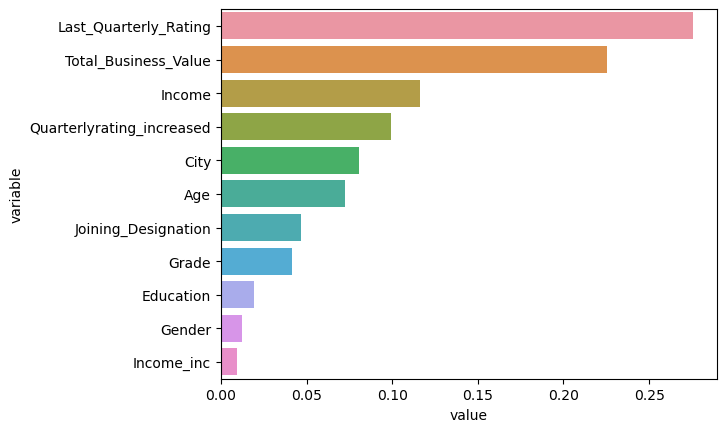

In [80]:
data = ind.melt()
sns.barplot(data.sort_values(by="value", ascending=False), y = "variable", x="value")

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       150
           1       0.82      0.94      0.88       327

    accuracy                           0.82       477
   macro avg       0.82      0.75      0.77       477
weighted avg       0.82      0.82      0.81       477



**Insights:**

- **(Precision):** The Random Forest With SMOTE method out of all predicted 0 the measure of correctly predicted is 82%, and for 1 it is 82%.
- **(Recall):** The Random Forest With SMOTE method out of all actual 0 the measure of correctly predicted is 56%, and for 1 it is 94%.

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
# model probabilities
prob = rf.predict_proba(X_test)


In [83]:
# for thresholding we need only one probability i.e. p = P(Y=1|X)
probability = prob[:,1]

In [84]:
fpr, tpr, thr = roc_curve(y_test, probability)

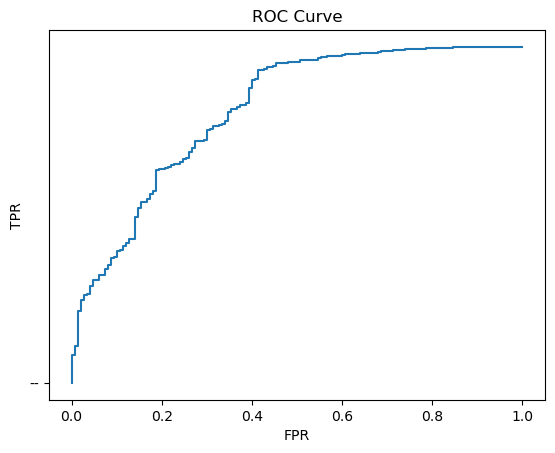

In [85]:
plt.plot(fpr,tpr)

plt.plot("--", color = "r") # random model
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [86]:
#AUC 
roc_auc_score(y_test, probability)

0.8129459734964322

In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [88]:
precision, recall, thr = precision_recall_curve(y_test, probability)

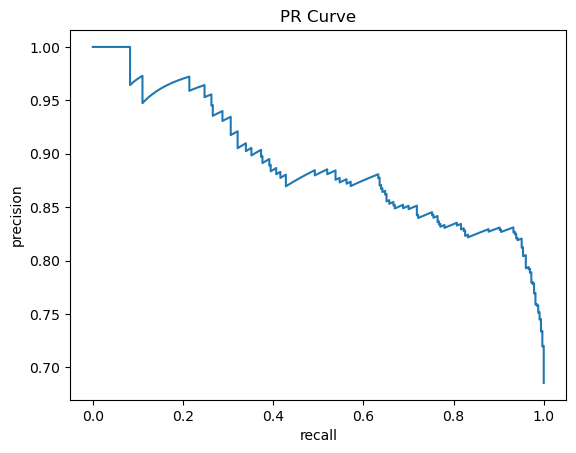

In [89]:
plt.plot(recall, precision)

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR Curve")
plt.show()

In [90]:
auc(recall, precision)

0.8902502845096157

# 6. Boosting 


In [91]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import datetime as dt

params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

# gradient boosting
gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train_sm, y_train_sm)

end = dt.datetime.now() 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [92]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.8191378002378924 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.8125632558824508 Rank: 6
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.8118971389254258 Rank: 8
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.8127861777706231 Rank: 5
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.8133418123296879 Rank: 4
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.8124972284244315 Rank: 7
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 5, 'learning_rate': 0.2} Mean_score: 0.816001804788757 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 3, 'learni

In [93]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:03.413918


In [94]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.3, max_depth=7, max_leaf_nodes=80,
                           n_estimators=150)


In [95]:
y_pred = clf.predict(X_test)

In [96]:
gbc = clf.best_estimator_
gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.3, max_depth=7, max_leaf_nodes=80,
                           n_estimators=150)

<Axes: xlabel='value', ylabel='variable'>

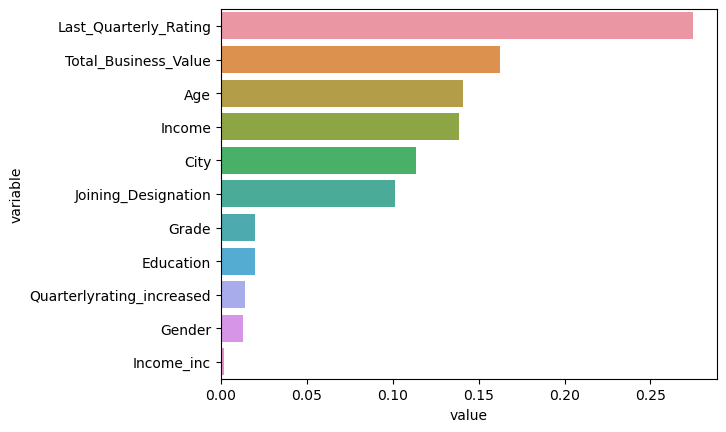

In [97]:
ind = pd.DataFrame(gbc.feature_importances_.reshape(1,-1), columns = X_train.columns)
data = ind.melt()
sns.barplot(data.sort_values(by="value", ascending=False), y = "variable", x = "value")  

In [98]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 78,  72],
       [ 52, 275]])

In [99]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}")


precision: 0.792507204610951
recall: 0.8409785932721713
f1_score: 0.8160237388724036


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56       150
           1       0.79      0.84      0.82       327

    accuracy                           0.74       477
   macro avg       0.70      0.68      0.69       477
weighted avg       0.73      0.74      0.73       477



**Insights:**

- **(Precision):** The Gradient Boosting With SMOTE method (RandomizedSearchCV) out of all predicted 0 the measure of correctly predicted is 66%, and for 1 it is 81%.
- **(Recall):** The Gradient Boosting With SMOTE method (RandomizedSearchCV) out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 87%.

In [101]:
# Hyperparameter tuning with GridSearchCV
gbc = GBC()
clf = GridSearchCV(gbc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train_sm, y_train_sm)

end = dt.datetime.now() 

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [102]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 20, 'n_estimators': 50} Mean_score: 0.7941766789105827 Rank: 142
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 20, 'n_estimators': 100} Mean_score: 0.7998845707554157 Rank: 131
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 20, 'n_estimators': 150} Mean_score: 0.8013769094326424 Rank: 124
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 20, 'n_estimators': 200} Mean_score: 0.8026047344387166 Rank: 111
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 40, 'n_estimators': 50} Mean_score: 0.7941766789105827 Rank: 142
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 40, 'n_estimators': 100} Mean_score: 0.7998845707554157 Rank: 131
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 40, 'n_estimators': 150} Mean_score: 0.8013769094326424 Rank: 124
Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_node

In [103]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:28.679744


In [104]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=80)


In [105]:
y_pred = clf.predict(X_test)

In [106]:
gbc = clf.best_estimator_
gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=80)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 85,  65],
       [ 47, 280]])

In [108]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}")


precision: 0.8115942028985508
recall: 0.8562691131498471
f1_score: 0.8333333333333335


# 7. XGBoost

In [109]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [110]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt


params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=2, silent=True)

In [111]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:43

In [112]:
re = random_search.cv_results_

for i in range(len(re["params"])):
  print(f"Parameters:{re['params'][i]} Mean_score: {re['mean_test_score'][i]} Rank: {re['rank_test_score'][i]}")

Parameters:{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.8083976320040428 Rank: 2
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.7878274720018771 Rank: 10
Parameters:{'subsample': 0.6, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6} Mean_score: 0.7975340895759446 Rank: 8
Parameters:{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.8049051989423432 Rank: 3
Parameters:{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.6} Mean_score: 0.8002522312766783 Rank: 7
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 1.0} Mean_score: 0.8045148947306675 Rank: 4
Parameters:{'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate':

In [113]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:01.216824


In [114]:
print(random_search.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)


In [115]:
xgb1 = random_search.best_estimator_

xgb1.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

<Axes: xlabel='value', ylabel='variable'>

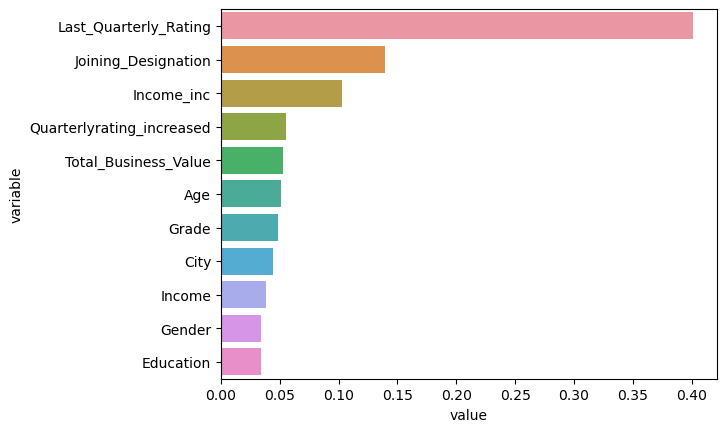

In [116]:

ind = pd.DataFrame(xgb1.feature_importances_.reshape(1,-1), columns=X_train.columns)
data = ind.melt()
sns.barplot(data.sort_values(by="value", ascending=False), y="variable", x="value")

In [117]:
y_pred = xgb1.predict(X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 79,  71],
       [ 43, 284]])

In [119]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}")


precision: 0.8
recall: 0.8685015290519877
f1_score: 0.8328445747800587


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.53      0.58       150
           1       0.80      0.87      0.83       327

    accuracy                           0.76       477
   macro avg       0.72      0.70      0.71       477
weighted avg       0.75      0.76      0.75       477



**Insights:**

- **(Precision):** The XG Boosting With SMOTE method (RandomizedSearchCV) out of all predicted 0 the measure of correctly predicted is 65%, and for 1 it is 80%.
- **(Recall):** The XG Boosting With SMOTE method (RandomizedSearchCV) out of all actual 0 the measure of correctly predicted is 53%, and for 1 it is 87%.

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
# model probabilities
prob = xgb1.predict_proba(X_test)

In [122]:
# for thresholding we need only one probability i.e. p = P(Y=1|X)
probability = prob[:,1]

In [123]:
fpr, tpr, thr = roc_curve(y_test, probability)

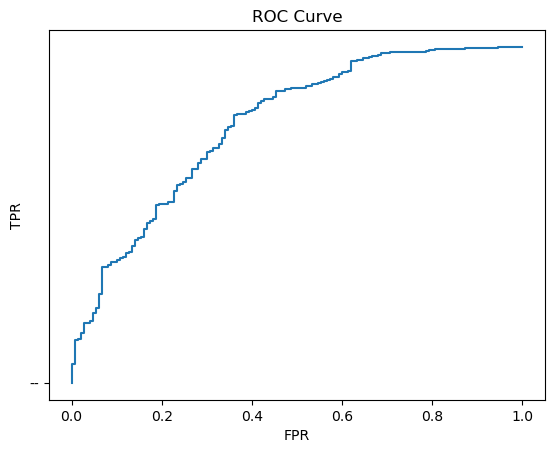

In [124]:
plt.plot(fpr,tpr)

plt.plot("--", color = "r") # random model
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [125]:
#AUC 
roc_auc_score(y_test, probability)

0.7706829765545362

In [126]:
precision, recall, thr = precision_recall_curve(y_test, probability)

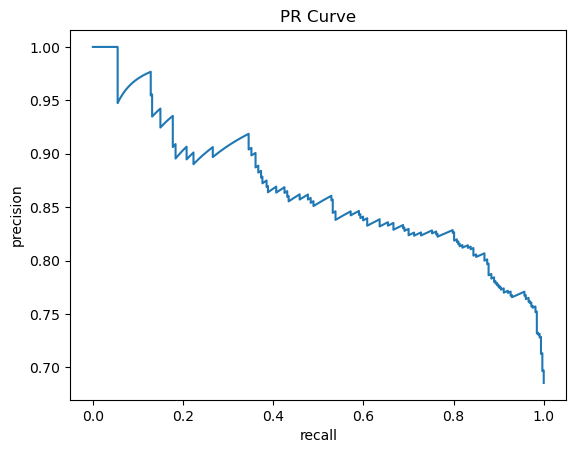

In [127]:
plt.plot(recall, precision)

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR Curve")
plt.show()

In [128]:
auc(recall, precision)

0.8648409562566282

**Final Insights:** 

- Most Important Features vary as per the model used:
   - **Random Forest:**
   - Last_Quarterly_rating
   - Total_Business_value
   - Income
   - Quarterlyrating_increased, and so on
   - **Gradient Boosting:**
   - Last_Quarterly_rating
   - Total_Business_value
   - Age
   - Income, and so on
   - **XG Boost:**
   - Last_Quarterly_rating
   - joining_Designation
   - income_inc
   - Quarterlyrating_increased, and so on
     
 
- All the models performed more or less same on the dataset.

**Inferences :**

- from data distribution: Male 1380 Female 956

- Churn : distribution: 1 1616 (67.870%) 0 765 (32.12%)

- Probability of Churn is higher in case of education level 0 and 1 than 2.

- in case of joining destination 1, probability of churn is higher.

- in case of quarterly rating is 1, probability of churn is significantly higher.

- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.

- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.

**Random Forest :**

- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89

**XGBoost Classifier:** (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100

- test Scores :

- Accuracy : 0.87

- f1 score : 0.90

- recall : 0.923

- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.

